In [1]:
import json
import pandas as pd
import plotly
import plotly.express as px

In [2]:
df = pd.read_csv('populacao_3.csv')

In [3]:
df

,uf,cidade,id,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AC,Acrelândia,1200013,8237.0,8454.0,8695.0,10668.0,11451.0,11786.0,11520.0,...,12779.0,13011.0,13353.0,13613.0,13869.0,14120.0,14366.0,15020.0,15256.0,15490.0
1,AC,Assis Brasil,1200054,3564.0,3611.0,3667.0,4852.0,5063.0,5153.0,5351.0,...,6192.0,6308.0,6480.0,6610.0,6738.0,6863.0,6986.0,7300.0,7417.0,7534.0
2,AC,Brasiléia,1200104,17384.0,17649.0,17944.0,16940.0,17721.0,18056.0,19065.0,...,21837.0,22261.0,22899.0,23378.0,23849.0,24311.0,24765.0,25848.0,26278.0,26702.0
3,AC,Bujari,1200138,6154.0,6382.0,6641.0,7654.0,8423.0,8751.0,6543.0,...,8629.0,8782.0,9003.0,9173.0,9339.0,9503.0,9664.0,10111.0,10266.0,10420.0
4,AC,Capixaba,1200179,5561.0,5814.0,6096.0,6287.0,7067.0,7403.0,8446.0,...,9088.0,9368.0,9836.0,10170.0,10498.0,10820.0,11136.0,11456.0,11733.0,12008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,TO,Tocantínia,1721109,5807.0,5828.0,5846.0,5872.0,5906.0,5927.0,6663.0,...,6809.0,6880.0,7158.0,7236.0,7313.0,7387.0,7460.0,7471.0,7545.0,7617.0
5566,TO,Tupirama,1721257,1202.0,1217.0,1234.0,1259.0,1291.0,1311.0,1405.0,...,1605.0,1634.0,1718.0,1751.0,1782.0,1813.0,1843.0,1860.0,1891.0,1922.0
5567,TO,Tupiratins,1721307,1377.0,1395.0,1409.0,1429.0,1455.0,1471.0,2007.0,...,2154.0,2208.0,2342.0,2402.0,2461.0,2518.0,2574.0,2613.0,2671.0,2729.0
5568,TO,Wanderlândia,1722081,10370.0,10486.0,10585.0,10724.0,10908.0,11022.0,9317.0,...,11036.0,11088.0,11450.0,11509.0,11566.0,11622.0,11677.0,11631.0,11683.0,11734.0


In [4]:
df.id = df.id.astype('str')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uf      5570 non-null   object 
 1   cidade  5570 non-null   object 
 2   id      5570 non-null   object 
 3   2001    5560 non-null   float64
 4   2002    5560 non-null   float64
 5   2003    5560 non-null   float64
 6   2004    5564 non-null   float64
 7   2005    5564 non-null   float64
 8   2006    5564 non-null   float64
 9   2007    5564 non-null   float64
 10  2008    5565 non-null   float64
 11  2009    5564 non-null   float64
 12  2010    5565 non-null   float64
 13  2011    5565 non-null   float64
 14  2012    5570 non-null   float64
 15  2013    5570 non-null   float64
 16  2014    5570 non-null   float64
 17  2015    5570 non-null   float64
 18  2016    5570 non-null   float64
 19  2017    5570 non-null   float64
 20  2018    5570 non-null   float64
 21  2019    5570 non-null   float64
 22  

In [6]:
 # Abrindo o JSON e guardando em um objeto Python
objeto_geo_cidades_MA = open('ma.json')

# Lendo o arquivo georreferenciado no formato JSON
geo_ma = json.load(objeto_geo_cidades_MA) 

In [7]:
# Salvando os dados percentuais
dicionario_ma = {}
for i in df[df.uf == 'MA'].index:
    # if df.loc[i][1] in ['Unaí', 'Paracatu', 'Moema', 'Lagoa da Prata', 'Luz', 'Bom Despacho']:
    perc = f'{((df.loc[i][-1]/df.loc[i][3])-1)*100:.2f}'
    #perc = perc.replace('.', ',')
    #print(perc,'|', df.loc[i][1], '|', df.loc[i][2])
    dicionario_ma[df.loc[i][1]] = [df.loc[i][1], df.loc[i][2], float(perc)]
        
#dicionario_ma

In [8]:
df_ma = pd.DataFrame(dicionario_ma.values(),columns=['cidade', 'id', 'percentual'])
df_ma

,cidade,id,percentual
0,Açailândia,2100055,23.97
1,Afonso Cunha,2100105,40.08
2,Água Doce do Maranhão,2100154,30.19
3,Alcântara,2100204,3.21
4,Aldeias Altas,2100303,43.55
...,...,...,...
212,Viana,2112803,19.00
213,Vila Nova dos Martírios,2112852,99.27
214,Vitorino Freire,2113009,-2.02
215,Vitória do Mearim,2112902,6.98


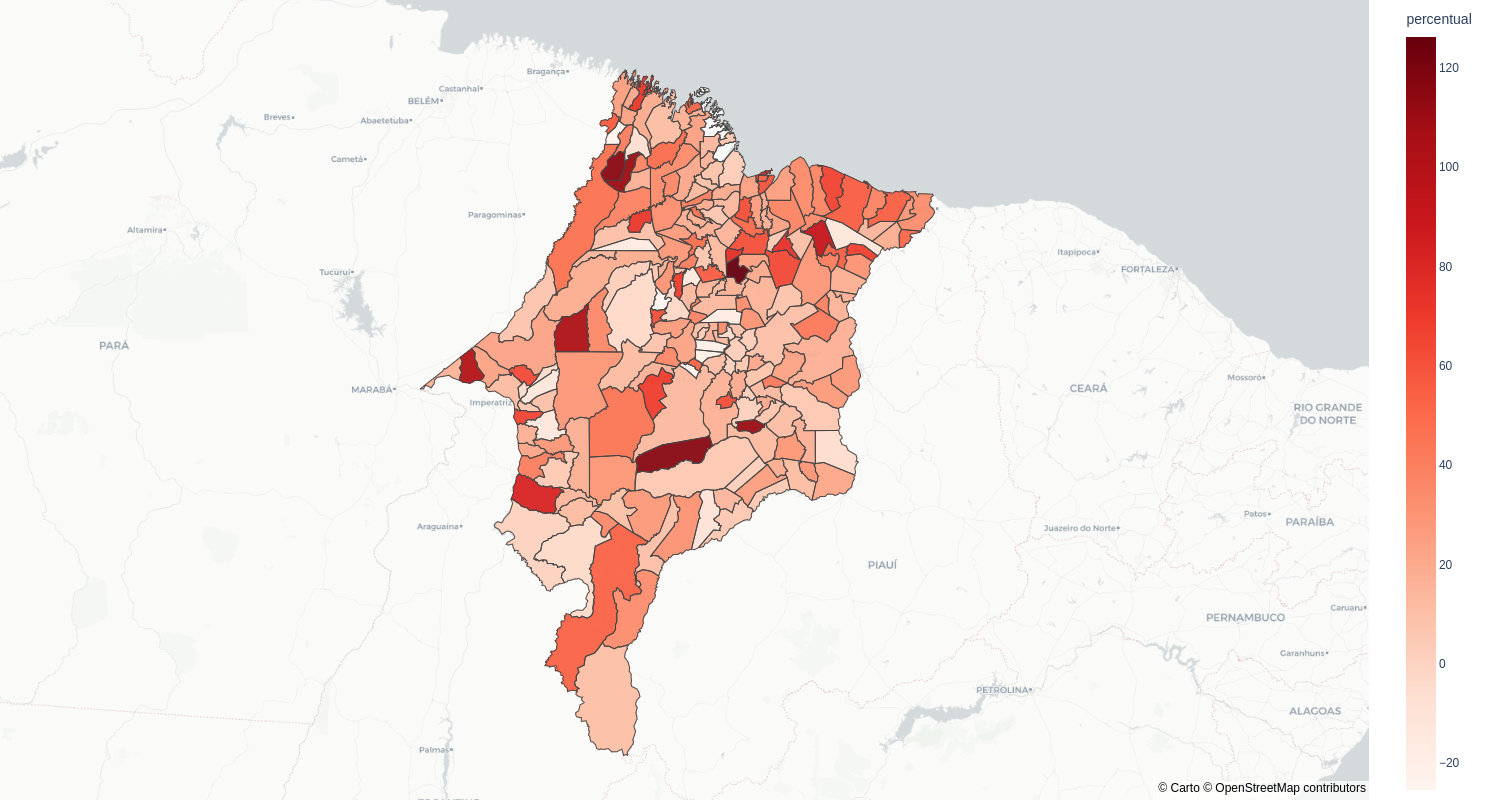

In [15]:
fig = px.choropleth_mapbox(
    df_ma,
    geojson = geo_ma,
    locations='id',
    featureidkey = 'properties.id',
    color = 'percentual',
    #animation_frame = '2020',
    hover_name = 'cidade',
    #hover_data = [‘casos’],
    #title = 'Minas Geais',
    #color_continuous_scale='Viridis',
    color_continuous_scale='Reds',
    #mapbox_style='open-street-map',
    mapbox_style="carto-positron",
    #mapbox_style='white-bg',
    #center = {'lat':-22.77972, 'lon': -48.5},
    center = {'lat': -5.5, 'lon': -45.18},
    zoom = 5.7,
    opacity = 0.95,
    width = 1000,
    height = 800,
)


fig.update_geos(
    fitbounds = 'locations',
    visible = False
)

fig.update_layout(margin={'r':0,'t':0,'l':0, 'b':0})

#plotly.offline.plot(fig, filename = 'minas_gerais.html')

fig.show()